<a href="https://colab.research.google.com/github/Mihir922/Data-Analytics-Project-/blob/main/Healthcare_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Healthcare Analytics**


**The goal of this project is to accurately predict the Length of Stay (LOC) for each patient so that the hospitals can optimize resources and function better.**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [45]:
train_data.isnull().sum().sort_values(ascending = False)


,0
City_Code_Patient,4532
Bed Grade,113
Hospital_code,0
Admission_Deposit,0
Age,0
Visitors with Patient,0
Severity of Illness,0
Type of Admission,0
patientid,0
case_id,0


In [46]:
train_data.shape


(318438, 18)

In [47]:
test_data.shape

(137057, 17)

In [48]:
for unique in train_data.columns:
  print(unique, train_data[unique ].nunique())

case_id 318438
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 92017
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [49]:
for unique in test_data.columns:
  print(unique, test_data[unique ].nunique())

case_id 137057
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 15
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 39607
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 27
Age 10
Admission_Deposit 6609


In [50]:
# Calculate the mode of "Bed Grade" for both DataFrames first
train_mode = train_data["Bed Grade"].mode()[0]
test_mode = test_data["Bed Grade"].mode()[0]


# # Then, use .loc to assign the mode to missing values
train_data.loc[train_data["Bed Grade"].isnull(), "Bed Grade"] = train_mode
test_data.loc[test_data["Bed Grade"].isnull(), "Bed Grade"] = test_mode

In [51]:
# Calculate the mode of "City_Code_Patient" for both DataFrames first
train_mode = train_data["City_Code_Patient"].mode()[0]
test_mode = test_data["City_Code_Patient"].mode()[0]


# # Then, use .loc to assign the mode to missing values
train_data.loc[train_data["City_Code_Patient"].isnull(), "City_Code_Patient"] = train_mode
test_data.loc[test_data["City_Code_Patient"].isnull(), "City_Code_Patient"] = test_mode

In [52]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [53]:
# Label Encoding Stay column in train dataset label_encoding_stay_column
from sklearn.preprocessing import LabelEncoder
label_encoding_stay_column = LabelEncoder()
train_data['Stay'] = label_encoding_stay_column.fit_transform(train_data['Stay'].astype('str'))

In [54]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [55]:
test_data['Stay'] = -1
df = pd.concat([train_data, test_data])
df.shape

(455495, 18)

In [56]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,-1
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,-1
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,-1
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,-1
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,-1


In [57]:
#Label Encoding all the columns in Train and test datasets
for all_label_encoding in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    label_encoding_all  = LabelEncoder()
    df[all_label_encoding] = label_encoding_all.fit_transform(df[all_label_encoding].astype(str))

In [58]:
train_data.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [59]:
#Spearating Train and Test Datasets
train_data = df[df['Stay']!=-1]
test_data = df[df['Stay']==-1]

In [60]:
train_data.head()
test_data.head()


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,2,3,2,3,2,3,0,2.0,17006,2.0,0,2,2,7,3095.0,-1
1,318440,29,0,4,0,2,2,3,5,2.0,17006,2.0,1,2,4,7,4018.0,-1
2,318441,26,1,2,1,3,2,1,3,4.0,17006,2.0,0,2,3,7,4492.0,-1
3,318442,6,0,6,0,3,2,1,5,2.0,17006,2.0,1,2,3,7,4173.0,-1
4,318443,28,1,11,0,2,2,2,5,2.0,17006,2.0,1,2,4,7,4161.0,-1


# **Feature Engineering**



In [61]:
def get_countid_enocde(train_data, test_data, cols, name):
  temp = train_data.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test_data.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  train_data = pd.merge(train_data, temp, how='left', on= cols)
  test_data = pd.merge(test_data,temp2, how='left', on= cols)
  train_data[name] = train_data[name].astype('float')
  test_data[name] = test_data[name].astype('float')
  train_data[name].fillna(np.median(temp[name]), inplace = True)
  test_data[name].fillna(np.median(temp2[name]), inplace = True)
  return train_data, test_data

In [62]:
train_data.head()
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,2,3,2,3,2,3,0,2.0,17006,2.0,0,2,2,7,3095.0,-1
1,318440,29,0,4,0,2,2,3,5,2.0,17006,2.0,1,2,4,7,4018.0,-1
2,318441,26,1,2,1,3,2,1,3,4.0,17006,2.0,0,2,3,7,4492.0,-1
3,318442,6,0,6,0,3,2,1,5,2.0,17006,2.0,1,2,3,7,4173.0,-1
4,318443,28,1,11,0,2,2,2,5,2.0,17006,2.0,1,2,4,7,4161.0,-1


In [63]:
from IPython.display import display

In [64]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [65]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,318439,21,2,3,2,3,2,3,0,2.0,17006,2.0,0,2,2,7,3095.0,-1
1,318440,29,0,4,0,2,2,3,5,2.0,17006,2.0,1,2,4,7,4018.0,-1
2,318441,26,1,2,1,3,2,1,3,4.0,17006,2.0,0,2,3,7,4492.0,-1
3,318442,6,0,6,0,3,2,1,5,2.0,17006,2.0,1,2,3,7,4173.0,-1
4,318443,28,1,11,0,2,2,2,5,2.0,17006,2.0,1,2,4,7,4161.0,-1


In [66]:
train_data, test_data = get_countid_enocde(train_data, test_data, ['patientid'], name = 'count_id_patient')
train_data, test_data = get_countid_enocde(train_data, test_data,
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
train_data, test_data = get_countid_enocde(train_data, test_data,
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

<ipython-input-61-35c70504f7ac>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[name].fillna(np.median(temp[name]), inplace = True)
<ipython-input-61-35c70504f7ac>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [67]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,count_id_patient,count_id_patient_hospitalCode,count_id_patient_wardfacilityCode
0,1,8,2,3,2,3,3,2,5,2.0,...,7.0,0,0,2,5,4911.0,0,14.0,4.0,5.0
1,2,2,2,5,2,2,3,3,5,2.0,...,7.0,1,0,2,5,5954.0,4,14.0,4.0,5.0
2,3,10,4,1,0,2,1,3,4,2.0,...,7.0,1,0,2,5,4745.0,3,14.0,4.0,2.0
3,4,26,1,2,1,2,3,2,3,2.0,...,7.0,1,0,2,5,7272.0,4,14.0,6.0,3.0
4,5,26,1,2,1,2,3,3,3,2.0,...,7.0,1,0,2,5,5558.0,4,14.0,6.0,3.0


In [68]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,count_id_patient,count_id_patient_hospitalCode,count_id_patient_wardfacilityCode
0,318439,21,2,3,2,3,2,3,0,2.0,...,2.0,0,2,2,7,3095.0,-1,7.0,1.0,1.0
1,318440,29,0,4,0,2,2,3,5,2.0,...,2.0,1,2,4,7,4018.0,-1,7.0,4.0,4.0
2,318441,26,1,2,1,3,2,1,3,4.0,...,2.0,0,2,3,7,4492.0,-1,7.0,2.0,2.0
3,318442,6,0,6,0,3,2,1,5,2.0,...,2.0,1,2,3,7,4173.0,-1,7.0,4.0,4.0
4,318443,28,1,11,0,2,2,2,5,2.0,...,2.0,1,2,4,7,4161.0,-1,7.0,4.0,4.0


In [69]:
test1 = test_data.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train_data.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [70]:
print(train1)

        Hospital_code  Hospital_type_code  City_Code_Hospital  \
0                   8                   2                   3   
1                   2                   2                   5   
2                  10                   4                   1   
3                  26                   1                   2   
4                  26                   1                   2   
...               ...                 ...                 ...   
318433              6                   0                   6   
318434             24                   0                   1   
318435              7                   0                   4   
318436             11                   1                   2   
318437             19                   0                   7   

        Available Extra Rooms in Hospital  Department  Ward_Type  Bed Grade  \
0                                       3           3          2        2.0   
1                                       2           3        

In [71]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,count_id_patient,count_id_patient_hospitalCode,count_id_patient_wardfacilityCode
0,318439,21,2,3,2,3,2,3,0,2.0,...,2.0,0,2,2,7,3095.0,-1,7.0,1.0,1.0
1,318440,29,0,4,0,2,2,3,5,2.0,...,2.0,1,2,4,7,4018.0,-1,7.0,4.0,4.0
2,318441,26,1,2,1,3,2,1,3,4.0,...,2.0,0,2,3,7,4492.0,-1,7.0,2.0,2.0
3,318442,6,0,6,0,3,2,1,5,2.0,...,2.0,1,2,3,7,4173.0,-1,7.0,4.0,4.0
4,318443,28,1,11,0,2,2,2,5,2.0,...,2.0,1,2,4,7,4161.0,-1,7.0,4.0,4.0


# **Models**

# **Naive Bayes Model**

In [72]:
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.naive_bayes import GaussianNB # Import GaussianNB

# Assuming 'train1' is your DataFrame with features and target
# and 'Stay' is the target column name
X = train1.drop('Stay', axis=1)
y = train1['Stay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100) # Split the data

# Create an imputer (fill NaN values with column mean)
imputer = SimpleImputer(strategy="mean")

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test set (if applicable)
X_test_imputed = imputer.transform(X_test)

# Now train the model
classifier_nb = GaussianNB()
model_nb = classifier_nb.fit(X_train_imputed, y_train.values.ravel())  # Use .ravel() for y_train if needed

In [73]:
prediction_nb = model_nb.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score_nb = accuracy_score(prediction_nb,y_test)
print("Acurracy:", acc_score_nb*100)

Acurracy: 34.55439015199096


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# **XGBoost Model**

In [74]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=800,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.75)

In [ ]:
model_xgb = classifier_xgb.fit(X_train, y_train)

In [76]:
prediction_xgb = model_xgb.predict(X_test)
acc_score_xgb = accuracy_score(prediction_xgb,y_test)
print("Accuracy:", acc_score_xgb*100)

Accuracy: 43.030084160281376


# **Neural Network**

In [77]:
# Segregation of features and target variable
X = train_data.drop('Stay', axis =1)
y = train_data['Stay']
print(X.columns)
z = test_data.drop('Stay', axis = 1)
print(z.columns)

# Data Scaling
from sklearn import preprocessing
X_scale = preprocessing.scale(X)
X_scale.shape

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'count_id_patient',
       'count_id_patient_hospitalCode', 'count_id_patient_wardfacilityCode'],
      dtype='object')
Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'count_id_patient',
       'count_id_patient_hospitalCode', 'count_id_patient_wardfacilityCode'],
      dtype='object')


(318438, 20)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size =0.20, random_state =100)

In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [80]:
from keras.utils import to_categorical
#Sparse Matrix
a = to_categorical(y_train)
b = to_categorical(y_test)

In [81]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (254750, 20)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 254750, 64)          │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 254750, 128)         │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 254750, 256)         │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 254750, 512)         │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 254750, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 254750, 11)          │           5,643 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 442,571 (1.69 MB)

 Trainable params: 442,571 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.compile(optimizer= 'SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
model = Sequential()
# The input shape should match the number of features in your data (20 in this case)
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(11, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
callbacks = [tf.keras.callbacks.TensorBoard("logs_keras")]
model.fit(X_train, a, epochs=2, callbacks=callbacks, validation_split = 0.2)

Epoch 1/2
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - accuracy: 0.4143 - loss: 1.5227 - val_accuracy: 0.4130 - val_loss: 1.5282
Epoch 2/2
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.4173 - loss: 1.5151 - val_accuracy: 0.4140 - val_loss: 1.5284


In [85]:
!tensorboard --logdir logs_keras

2025-01-31 09:16:37.923101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738314997.954518    4817 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738314997.961973    4817 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 09:16:44.273079: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, u

In [96]:
# Assuming there are 11 classes (0 to 10)
num_classes = 11  # Replace with the actual number of classes in your target variable

# Ensure 'Stay' has values only in the range 0 to 10
# Before applying to_categorical, make sure your target variable 'Stay' in your
# training data has values in the range 0 to num_classes - 1.
# You can do this using the following line:
y_train = y_train.clip(0, num_classes - 1) # clip values below 0 to 0, and values above 10 to 10
y_test = y_test.clip(0, num_classes - 1) # clip values below 0 to 0, and values above 10 to 10


# Re-apply to_categorical
a = to_categorical(y_train, num_classes=num_classes)
b = to_categorical(y_test, num_classes=num_classes)

# ... (Rest of your code to define and compile the model) ...




model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train your model
model.fit(X_train, a, epochs=4, validation_split=0.2)
print("\n Model Evaluation")
model.evaluate(X_test, b)

Epoch 1/4
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.4170 - loss: 1.5100 - val_accuracy: 0.4162 - val_loss: 1.5219
Epoch 2/4
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.4202 - loss: 1.5055 - val_accuracy: 0.4157 - val_loss: 1.5194
Epoch 3/4
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.4225 - loss: 1.5028 - val_accuracy: 0.4139 - val_loss: 1.5242
Epoch 4/4
6369/6369 ━━━━━━━━━━━━━━━━━━━━ 48s 8ms/step - accuracy: 0.4240 - loss: 1.4952 - val_accuracy: 0.4189 - val_loss: 1.5168

 Model Evaluation
1991/1991 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4143 - loss: 1.5191


[1.5151735544204712, 0.417928010225296]

# **Predictions**

In [97]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Get the columns used during training (excluding 'Stay')
# 'case_id' has already been removed previously
train_cols = train1.drop(['Stay'], axis=1).columns

# Select the same columns from the test data
# and ensure they are in the same order
test1_subset = test1[train_cols]

# Fit the imputer on the training data subset
imputer.fit(train1[train_cols])

# Transform the test data subset to fill NaN values
test1_imputed = imputer.transform(test1_subset)

In [98]:
# Assuming 'prediction_nb' contains the predictions from your Naive Bayes model
# and 'test_data' is your original test DataFrame

# Create result_nb DataFrame
result_nb = test_data[['case_id']].copy()  # Start with 'case_id' column

# Instead of directly assigning prediction_nb, create a new Series with the correct index
result_nb['Stay'] = pd.Series(prediction_nb, index=test_data.index[:len(prediction_nb)]) # this takes care of the length of prediction_nb

# Now you can replace the numerical values in 'Stay' with the desired labels
result_nb['Stay'] = result_nb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30',
                                               3:'31-40', 4: '41-50', 5: '51-60',
                                               6: '61-70', 7: '71-80', 8: '81-90',
                                               9: '91-100', 10: 'More than 100 Days'})

result_nb.head()

,case_id,Stay
0,318439,21-30
1,318440,31-40
2,318441,21-30
3,318442,21-30
4,318443,21-30


In [99]:
# XGBoost
pred_xgb = classifier_xgb.predict(test1.iloc[:,1:])
result_xgb = pd.DataFrame(pred_xgb, columns=['Stay'])
result_xgb['case_id'] = test1['case_id']
result_xgb = result_xgb[['case_id', 'Stay']]

In [100]:
result_xgb['Stay'] = result_xgb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_xgb.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [101]:
# Neural Network
test_scale = preprocessing.scale(z)
test_scale.shape

(137057, 20)

In [102]:
# Instead of:
# pred = model.predict_classes(test_scale)

# Use:
pred = np.argmax(model.predict(test_scale), axis=-1)
# predict gives probabilities for each class, argmax finds the index of the highest probability
pred

4284/4284 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step


array([0, 5, 2, ..., 2, 1, 5])

In [103]:
result_nn = pd.DataFrame(pred, columns=['Stay'])
result_nn['case_id'] = test_data['case_id'] # Changed 'test' to 'test_data'
result_nn = result_nn[['case_id', 'Stay']]

In [104]:
result_nn['Stay'] = result_nn['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nn.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


# **Results**

In [105]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   1178
11-20                 12449
21-30                 33635
31-40                  7047
41-50                   224
51-60                  6474
61-70                    51
71-80                   485
81-90                   130
91-100                    1
More than 100 Days     2014
Name: case_id, dtype: int64


In [106]:
# XGBoost
print(result_xgb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   4462
11-20                 39080
21-30                 58320
31-40                 12554
41-50                    60
51-60                 18900
61-70                    12
71-80                   297
81-90                  1112
91-100                   70
More than 100 Days     2190
Name: case_id, dtype: int64


In [107]:
# Neural Networks
print(result_nn.groupby('Stay')['case_id'].nunique())

Stay
0-10                   3485
11-20                 46608
21-30                 51897
31-40                 13795
41-50                     6
51-60                 19209
71-80                    21
81-90                   335
More than 100 Days     1701
Name: case_id, dtype: int64


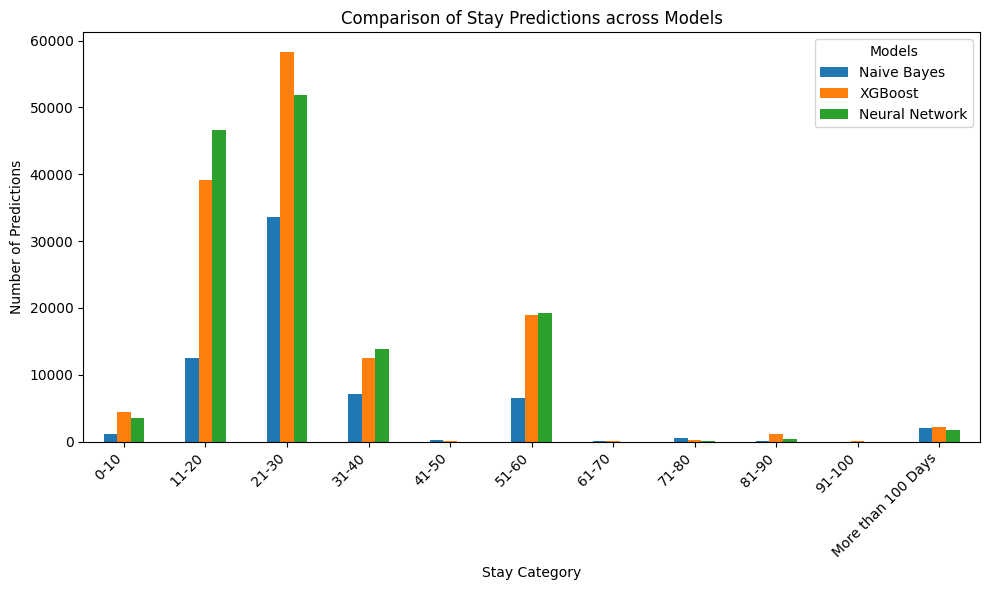

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine stay predictions from all models
stay_counts = pd.concat([
    result_nb.groupby('Stay')['case_id'].nunique().rename('Naive Bayes'),
    result_xgb.groupby('Stay')['case_id'].nunique().rename('XGBoost'),
    result_nn.groupby('Stay')['case_id'].nunique().rename('Neural Network')
], axis=1)


stay_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Stay Predictions across Models')
plt.xlabel('Stay Category')
plt.ylabel('Number of Predictions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Models')
plt.tight_layout()
plt.show()

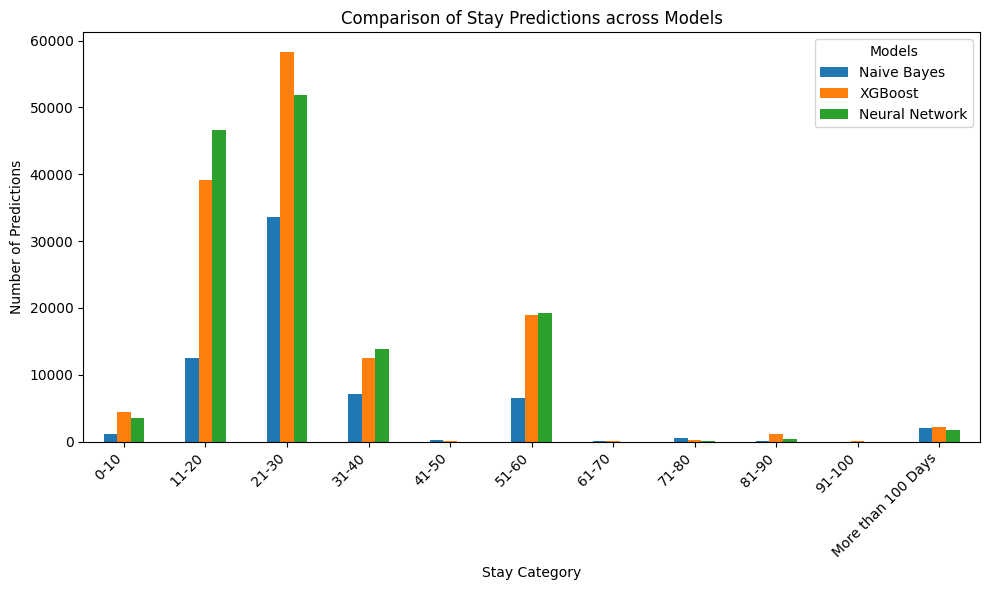

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

stay_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Stay Predictions across Models')
plt.xlabel('Stay Category')
plt.ylabel('Number of Predictions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Models')
plt.tight_layout()
plt.show()